# Decision tree implementation

## Setting up

In [1]:
# Installing dependencies
!apt install -y graphviz  # installingthe graphviz backend on a linux system
!pip install graphviz  # installing the python frontend for graphviz

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/openjdk-11.0.2.jdk/Contents/Home/bin/apt" (-1)


In [2]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score
import pytest

## Visualization

In [3]:
# Dataset adapted from https://archive.ics.uci.edu/ml/datasets/Zoo
url = 'https://raw.githubusercontent.com/MLCourse-LU/Datasets/main/zoo.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)


X = df.iloc[:, 1:-1]  # column 0 has the animal names, the last column has the labels
y = df.iloc[:, -1]  # use the last column as labels

fn = list(X.columns)  # get the column names of the features
cn = y.unique()  # get the different animal labels from the target column

In [4]:
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    object
dtypes: int64(16), object(2)
memory usage: 15.0+ KB
None
             hair 

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
ID,,,,,,,,,,,,,,,,,,
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,Mammal


In [25]:
model = DecisionTreeClassifier()
model.fit(X, y)  # train on the WHOLE dataset


DecisionTreeClassifier()

### Text visualization

In [26]:
# Show the model as text
print(export_text(model, feature_names=fn))

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- fins <= 0.50
|   |   |   |--- backbone <= 0.50
|   |   |   |   |--- airborne <= 0.50
|   |   |   |   |   |--- predator <= 0.50
|   |   |   |   |   |   |--- legs <= 0.50
|   |   |   |   |   |   |   |--- class: Invertebrate
|   |   |   |   |   |   |--- legs >  0.50
|   |   |   |   |   |   |   |--- class: Bug
|   |   |   |   |   |--- predator >  0.50
|   |   |   |   |   |   |--- class: Invertebrate
|   |   |   |   |--- airborne >  0.50
|   |   |   |   |   |--- class: Bug
|   |   |   |--- backbone >  0.50
|   |   |   |   |--- aquatic <= 0.50
|   |   |   |   |   |--- class: Reptile
|   |   |   |   |--- aquatic >  0.50
|   |   |   |   |   |--- eggs <= 0.50
|   |   |   |   |   |   |--- class: Reptile
|   |   |   |   |   |--- eggs >  0.50
|   |   |   |   |   |   |--- class: Amphibian
|   |   |--- fins >  0.50
|   |   |   |--- class: Fish
|   |--- feathers >  0.50
|   |   |--- class: Bird
|--- milk >  0.50
|   |--- class: Mammal



This makes sense - we can see at the bottom for example that if `milk > 0.5` holds, which means the animal produces milk, then it's a mammal.

In [27]:
# Use the sklearn.tree.export_graphviz method to export the tree in "dot" format
dot = export_graphviz(
    decision_tree=model,  # the tree to visualize
    out_file=None,  # if None, return it as a string with "dot" information
    feature_names=fn,  # list of feature names
    class_names=sorted(cn),  # sorted! list of class names
    filled=True  # pretty colors
)

print(dot)  # "dot" is a string containing a structural description of our future graphic:

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="milk <= 0.5\ngini = 0.759\nsamples = 101\nvalue = [4, 20, 8, 13, 10, 41, 5]\nclass = Mammal", fillcolor="#ebccf8"] ;
1 [label="feathers <= 0.5\ngini = 0.785\nsamples = 60\nvalue = [4, 20, 8, 13, 10, 0, 5]\nclass = Bird", fillcolor="#f4fbe2"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fins <= 0.5\ngini = 0.766\nsamples = 40\nvalue = [4, 0, 8, 13, 10, 0, 5]\nclass = Fish", fillcolor="#ebfcfc"] ;
1 -> 2 ;
3 [label="backbone <= 0.5\ngini = 0.719\nsamples = 27\nvalue = [4, 0, 8, 0, 10, 0, 5]\nclass = Invertebrate", fillcolor="#eaedfc"] ;
2 -> 3 ;
4 [label="airborne <= 0.5\ngini = 0.494\nsamples = 18\nvalue = [0, 0, 8, 0, 10, 0, 0]\nclass = Invertebrate", fillcolor="#d7ddfa"] ;
3 -> 4 ;
5 [label="predator <= 0.5\ngini = 0.278\nsamples = 12\nvalue = [0, 0, 2, 0, 10, 0, 0]\nclass = Invertebrate", fillcolor="#6178ea"] ;
4 -> 5 ;
6 [label="legs <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [0, 0,

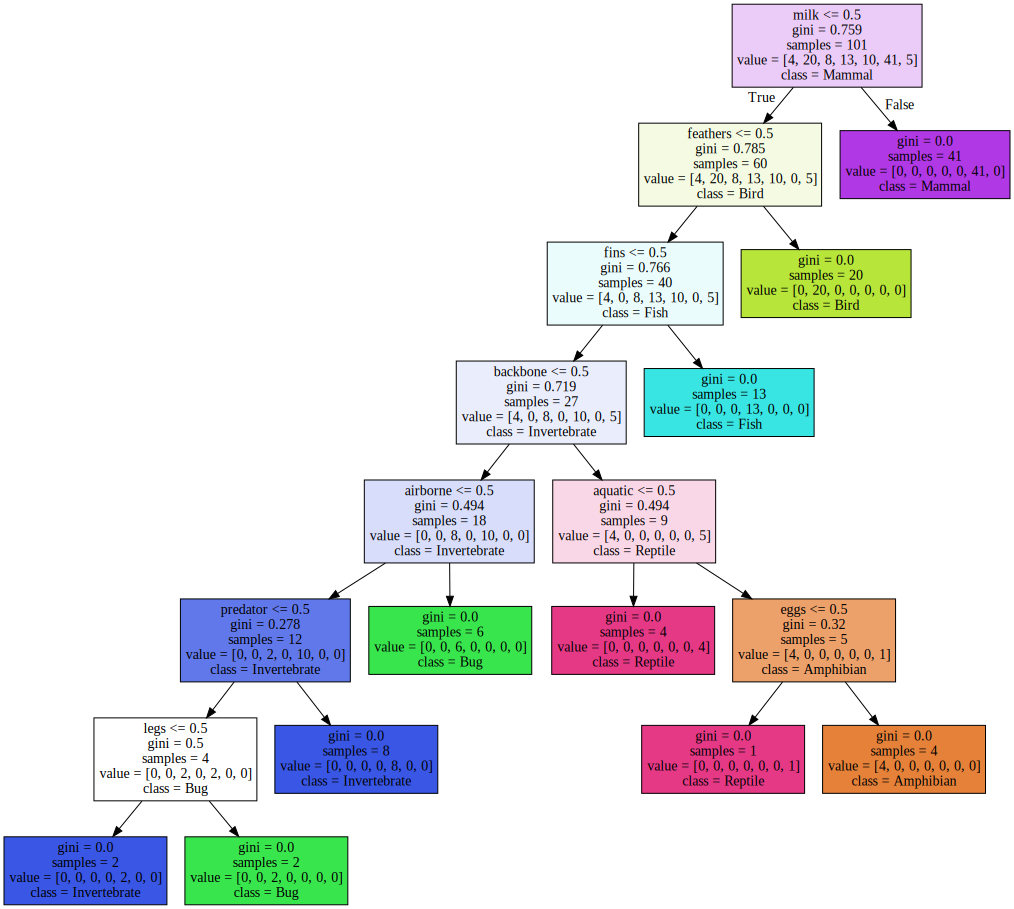

In [28]:
# Load the dot information into a graphviz object
graph = graphviz.Source(dot)

# Print a copy to disk
graph.render('graphviz-tree', format='pdf', cleanup=True)  # save it as a file and clean up helper files

# Show the result if using a Notebook
graph

## Assembling the tree

In [29]:
def minority_class(labels):
    if len(labels) == 0:
        return 0dd
    frequencies = labels.value_counts().values  # array, sorted in descending order
    probabilities = [f / len(labels) for f in frequencies[1:]]   # everything except the first class
    impurity = sum(probabilities)
    return impurity

Use the formula given above, and minority class and Gini impurity as examples, and implement entropy as an impurity measure:

In [32]:
def entropy(labels):
    label_freq = {}
    temp = 0
    for i in labels:
        if i in label_freq:
            label_freq[i] += 1
        else:
            label_freq[i] = 1
    for label in label_freq.values():
        temp += (label/len(labels))*np.log2(label/len(labels))
    return -(temp)

In [33]:
def test_entropy():
    data = pd.Series(['a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'])
    assert 0.97 < entropy(data) < 0.98  # simple two-label
    data = pd.Series(['a', 'a', 'a', 'a', 'a', 'c', 'b', 'b', 'b', 'b'])
    assert 1.36 < entropy(data) < 1.37  # three labels
    data = pd.Series(['a', 'a', 'a', 'c', 'c', 'c', 'b', 'b', 'b', 'b'])
    assert 1.57 < entropy(data) < 1.58  # no absolute majority
    data = pd.Series([1, 1, -1, -1])
    assert entropy(data) == 1.0  # even split, numeric labels
    data = pd.Series([1, -1, -1, -1])
    assert 0.81 < entropy(data) < 0.82  # first instance != majority
    data = pd.Series([1, 'a', -1, -1])
    assert entropy(data) == 1.5  # mixed data types
    

test_entropy()

## Building your own tree

In [34]:
class DTree:
    def __init__(self, metric):
        """Set up a new tree.

        We use the `metric` parameter to supply a impurity function such as Gini or Entropy.
        The other class variables should be set by the "fit" method.
        """
        self._metric = metric  # what are we measuring impurity with? (Gini, Entropy, Minority Class...)
        self._samples = None  # how many training samples reached this node?
        self._distribution = []  # what was the class distribution in this node?
        self._label = None  # What was the majority class of training samples that reached this node?
        self._impurity = None  # what was the impurity at this node?
        self._split = False  # if False, then this is a leaf. If you branch from this node, use this to store the name of the feature you're splitting on.
        self._yes = None  # Holds the "yes" DTree object; None if this is still a leaf node
        self._no = None  # Holds the "no" DTree object; None if this is still a leaf node

    def _best_split(self, features, labels):
        """ Determine the best feature to split on.
        :param features: a pd.DataFrame with named training feature columns
        :param labels: a pd.Series or pd.DataFrame with training labels
        :return: `best_so_far` is a string with the name of the best feature,
        and `best_so_far_impurity` is the impurity on that feature

        For each candidate feature the weighted impurity of the "yes" and "no"
        instances for that feature are computed using self._metric.

        We select the feature with the lowest weighted impurity.
        """
        best_so_far_impurity = 1
        for feature in features:
            yes_indices = features[feature].loc[features[feature] == True]
            no_indices = features[feature].loc[features[feature] == False]
            yes_labels = labels.isin(yes_indices).reindex_like(yes_indices)
            no_labels = labels.isin(no_indices).reindex_like(no_indices)
            yes_impurity = self._metric(yes_labels)
            no_impurity = self._metric(no_labels)
            weighted_impurity = yes_impurity * (len(yes_indices)/(len(yes_indices) + len(no_indices))) + no_impurity * (len(no_indices)/(len(yes_indices) + len(no_indices)))
            if weighted_impurity < best_so_far_impurity:
                best_so_far_impurity = weighted_impurity
                best_so_far = feature
        return best_so_far, best_so_far_impurity

    def fit(self, features, labels):
        """ Generate a decision tree by recursively fitting & splitting them

        :param features: a pd.DataFrame with named training feature columns
        :param labels: a pd.Series or pd.DataFrame with training labels
        :return: Nothing.

        First this node is fitted as if it was a leaf node: the training majority label, number of samples,
        class distribution and impurity.

        Then we evaluate which feature might give the best split.

        If there is a best split that gives a lower weighed impurity of the child nodes than the impurity in this node,
        initialize the self._yes and self._no variables as new DTrees with the same metric.
        Then, split the training instance features & labels according to the best splitting feature found,
        and fit the Yes subtree with the instances that split to the True side,
        and the No subtree with the instances that are False according to the splitting feature.
        """
        self._label = labels.value_counts().idxmax()
        self._samples = labels.size
        self._distribution.append(labels.value_counts().values)
        self._impurity = self._metric(labels)
        print(self._impurity)

        split, split_impurity = self._best_split(features, labels)  # Find the best split, if any

        if split_impurity < self._impurity and split is not None:
            self._split = split
            self._yes = DTree(metric=self._metric)
            self._no = DTree(metric=self._metric)
            yes_features = features.loc[features[split] == 1]
            yes_labels = labels.loc[features[split] == 1]
            no_features = features.loc[features[split] == 0]
            no_labels = labels.loc[features[split] == 0]
            self._no.fit(no_features, no_labels)
            self._yes.fit(yes_features, yes_labels)
        else:
            self._split = False
        print(self.to_text())

    def predict(self, features):
        """ Predict the labels of the instances based on the features

        :param features: pd.DataFrame of test features
        :return: predicted labels

        We start by initializing an array of labels where we naively predict this node's label.
        The datatype of this array is set to `object` because otherwise numpy
        might select the minimum needed string length for the current label, regardless of child labels.

        Then if this is not a leaf node, we overwrite those values with the values of Yes and No child nodes,
        based on the feature split in this node.
        """
        results = np.full(features.shape[0], self._label, dtype=object)  # object!!!
        if self._split:  # branch node; recursively replace predictions with child predictions
            yes_index = features[self._split] > 0.5
            results[yes_index] = self._yes.predict(features.loc[yes_index])
            results[~yes_index] = self._no.predict(features.loc[~yes_index])
        return results

    def to_text(self, depth=0):
        if self._split:
            text = f'{"|   " * depth}|---{self._split} = no\n'
            text += self._no.to_text(depth=depth + 1)
            text += f'{"|   " * depth}|---{self._split} = yes\n'
            text += self._yes.to_text(depth=depth + 1)

        else:
            text = f'{"|   " * depth}|---{self._label} ({self._samples})\n'.upper()
        return text

In [30]:
def gini(labels):
    label_freq = {}
    temp = 0
    for i in labels:
        if i in label_freq:
            label_freq[i] += 1
        else:
            label_freq[i] = 1
    for label in label_freq.values():
        temp += (label/len(labels))**2
    return round(1-temp,3)

In [31]:
def test_gini():
    data = pd.Series(['a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'])
    assert gini(data) == 0.48  # simple two-label
    data = pd.Series(['a', 'a', 'a', 'a', 'a', 'c', 'b', 'b', 'b', 'b'])
    assert gini(data) == 0.58  # three labels
    data = pd.Series(['a', 'a', 'a', 'c', 'c', 'c', 'b', 'b', 'b', 'b'])
    assert gini(data) == 0.66  # no absolute majority
    data = pd.Series([1, 1, -1, -1])
    assert gini(data) == 0.5  # even split, numeric labels
    data = pd.Series([1, -1, -1, -1])
    assert gini(data) == 0.375  # first instance != majority
    data = pd.Series([1, 'a', -1, -1])
    assert gini(data) == 0.625  # mixed data types
    

test_gini()

In [35]:
# A toy dataset about judging the ripeness of avocados
avocados = pd.DataFrame(data={
        'green':     [1, 1, 1, 1, 0, 0, 0, 0],
        'brown':     [1, 1, 0, 1, 1, 1, 0, 1],
        'firmness':  [1, 1, 0, 1, 1, 0, 1, 1],
        'softness':  [0, 1, 1, 1, 1, 1, 1, 1],
        'nub_loose': [0, 1, 1, 1, 0, 1, 1, 0],
        'ripe':      [0, 1, 0, 1, 0, 0, 1, 1]
})

In [36]:
def test_DTree_best_split_minority():
    # Using minority class
    model = DTree(metric=minority_class)
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    feature, impurity = model._best_split(X, y)
    assert feature == 'firmness'
    assert impurity == 0.25
    

test_DTree_best_split_minority()

In [37]:
def test_DTree_best_split_gini():
    # Using gini
    model = DTree(metric=gini)
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    feature, impurity = model._best_split(X, y)
    assert feature == 'firmness'
    assert 0.33 < impurity < 0.34
    

test_DTree_best_split_gini()

In [38]:
def test_DTree_best_split_entropy():
    # Using entropy
    model = DTree(metric=entropy)
    X = avocados.iloc[:, [0, 1, 3, 4]]  # leave out firmness as feature
    y = avocados.iloc[:, -1]
    feature, impurity = model._best_split(X, y)
    assert feature == 'softness'
    assert 0.86 < impurity < 0.87

    
test_DTree_best_split_entropy()

In [40]:
def test_DTree_fit_basics():
        """" Check if the fit function filled in these values """
        X = avocados.iloc[:, :-1]
        y = avocados.iloc[:, -1]
        model = DTree(metric=minority_class)
        assert model._label is None, "Before fitting, this should not be set yet."
        assert model._impurity is None, "Before fitting, this should not be set yet."
        assert model._samples is None, "Before fitting, this should not be set yet."
        assert len(model._distribution) == 0, "Before fitting, this should not be set yet."
        model.fit(X, y)
        assert model._label is not None, "After fitting, we should know the majority label in the top node"
        assert model._impurity is not None, "After fitting, we should know the impurity in the top node"
        assert isinstance(model._samples, int), "After fitting, this count how many training samples reached this node"
        assert len(model._distribution) > 0, "After fitting, this should store the frequency of each class in the node"
    
    
    test_DTree_fit_basics()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [41]:
def test_DTree_fit_children():
    """ Check if the root node has split (it should) and has child nodes """
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    model = DTree(metric=minority_class)
    assert model._split is False, "Before fitting, this should not be set yet."
    assert model._yes is None, "Before fitting, this should not be set yet."
    assert model._no is None, "Before fitting, this should not be set yet."
    model.fit(X, y)
    assert model._split is not False, "After fitting, the top node should have split"
    assert isinstance(model._yes, DTree), "The Yes child node should be a subtree"
    assert isinstance(model._no, DTree), "The No child node should be a subtree"
    
    
test_DTree_fit_children()

0.5
0
|---0 (2)

0.3333333333333333
0.3333333333333333
|---0 (3)

0
|---1 (3)

|---nub_loose = no
|   |---0 (3)
|---nub_loose = yes
|   |---1 (3)

|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)



In [42]:
def test_DTree_fit_recusively_children():
    """ Check recursively if each node is either a leaf, or split and has two children """
    def recursive(model):
        if model._split:
            assert isinstance(model._yes, DTree), "The Yes child node should be a subtree"
            assert isinstance(model._no, DTree), "The No child node should be a subtree"
            recursive(model._yes)
            recursive(model._no)
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    model = DTree(metric=minority_class)
    model.fit(X, y)
    recursive(model)
    
    
test_DTree_fit_recusively_children()

0.5
0
|---0 (2)

0.3333333333333333
0.3333333333333333
|---0 (3)

0
|---1 (3)

|---nub_loose = no
|   |---0 (3)
|---nub_loose = yes
|   |---1 (3)

|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)



Each node should be labeled, not only the leaf nodes.

In [43]:
def test_DTree_fit_recusively_child_labels():
    """ Check recursively if each node is labeled """
    def recursive(model):
        assert model._label is not None, "Each node should be labeled."
        if model._split:
            recursive(model._yes)
            recursive(model._no)
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    model = DTree(metric=minority_class)
    model.fit(X, y)
    recursive(model)
    
    
test_DTree_fit_recusively_child_labels()

0.5
0
|---0 (2)

0.3333333333333333
0.3333333333333333
|---0 (3)

0
|---1 (3)

|---nub_loose = no
|   |---0 (3)
|---nub_loose = yes
|   |---1 (3)

|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)



Splits should only happen if the weighed impurity of the children is lower than that of the parent:

In [44]:
def test_DTree_fit_recusively_decreasing_impurity():
    """ Check if the weighted impurity of children is always lower than that of the parent """
    def recursive_impurity(model):
        if model._split:
            yes_impurity, yes_samples = recursive_impurity(model._yes)
            no_impurity, no_samples = recursive_impurity(model._no)
            weighted_impurity = (yes_impurity * yes_samples) + (no_impurity * no_samples)
            assert weighted_impurity < (model._impurity * model._samples), (
                "The weighted impurity of the children should be smaller than the parent")
        return model._impurity, model._samples
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    model = DTree(metric=minority_class)
    model.fit(X, y)
    recursive_impurity(model)
    
    
test_DTree_fit_recusively_decreasing_impurity()

0.5
0
|---0 (2)

0.3333333333333333
0.3333333333333333
|---0 (3)

0
|---1 (3)

|---nub_loose = no
|   |---0 (3)
|---nub_loose = yes
|   |---1 (3)

|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)



In [45]:
def test_DTree_fit_text_string():
    """ Check if we've learned the RIGHT model """
    X = avocados.iloc[:, :-1]
    y = avocados.iloc[:, -1]
    model = DTree(metric=minority_class)
    model.fit(X, y)
    text = model.to_text()
    # Compare the text that you actually got to what it should be:
    assert '\n'+text == ("""
|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)
"""), "The tree should look like this"
    
    
test_DTree_fit_text_string()

0.5
0
|---0 (2)

0.3333333333333333
0.3333333333333333
|---0 (3)

0
|---1 (3)

|---nub_loose = no
|   |---0 (3)
|---nub_loose = yes
|   |---1 (3)

|---firmness = no
|   |---0 (2)
|---firmness = yes
|   |---nub_loose = no
|   |   |---0 (3)
|   |---nub_loose = yes
|   |   |---1 (3)



### Testing the tree

In [46]:
# Dataset adapted from https://archive.ics.uci.edu/ml/datasets/Zoo
url = 'zoo.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

X = df.iloc[:, 1:-1]  # column 0 has the animal names, the last column has the labels
y = df.iloc[:, -1]  # use the last column as labels


model = DTree(metric=minority_class)
# model = DTree(metric=gini)
model.fit(X, y)

0.5940594059405941
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.6551724137

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# Show it in text
print(model.to_text())

In [ ]:
viz = model.to_graphviz(size='10,10')
viz.render('homebrew', format='pdf', cleanup=True)
viz

## Trees are sensitive


Let's make sure our data is loaded.

In [ ]:
# Dataset adapted from https://archive.ics.uci.edu/ml/datasets/Zoo
url = 'https://raw.githubusercontent.com/MLCourse-LU/Datasets/main/zoo.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

X = df.iloc[:, 1:-1]  # column 0 has the animal names, the last column has the labels
y = df.iloc[:, -1]  # use the last column as labels

Now, suppose you wanted to know whether the Gini or the Minority Class impurity measure was better for fitting the tree. And you're using accuracy to score your model performance with. You can run the code below to fit a model, then make some predictions with it and evaluate the accuracy.

**Try it multiple times, both for the Gini and the Minority Class model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = DTree(metric=minority_class)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
viz = model.to_graphviz(size='10,10')
viz.render('homebrew_gini', format='pdf', cleanup=True)
viz

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = DTree(metric=minority_class)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
viz = model.to_graphviz(size='10,10')
viz.render('homebrew_minority', format='pdf', cleanup=True)
viz